In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch
import time

sys.path.append("../Lib")

from mcmc import MetropolisGauss
from square import Square
from flow import BG_RealNVP
from plot import plot_forward_backward_2d

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [4]:
energy_array=np.load('..\Data\square_data\energy_two_squares.npy')

In [5]:
density=np.exp(-energy_array)

In [6]:
n_sample=10000

Ix, Iy = np.meshgrid(np.arange(density.shape[0]), np.arange(density.shape[1]))
idx = np.vstack([Ix.flatten(), Iy.flatten()]).T
density_normed = density.astype(np.float64)
density_normed /= density_normed.sum()
density_flat = density_normed.flatten()
i = np.random.choice(idx.shape[0], size=n_sample, p=density_flat)
ixy = idx[i, :]
mean = np.array([90,90])
scale = np.array([2,2])
xy = ixy  - 0.5 +  0* np.random.rand(n_sample, 2)
xy = xy  / scale-mean


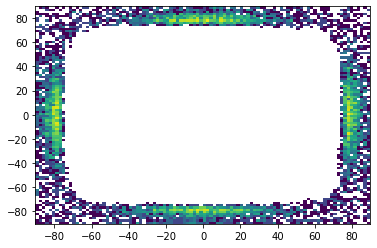

In [7]:
ax=plt.gca()
ax.hist2d(xy[:,0],xy[:,1],bins=100,norm=matplotlib.colors.LogNorm())
plt.show()

In [8]:
X=np.arange(-90,90+0.5,0.5)
Y=np.arange(-90,90+0.5,0.5)
XX,YY=np.meshgrid(X,Y)

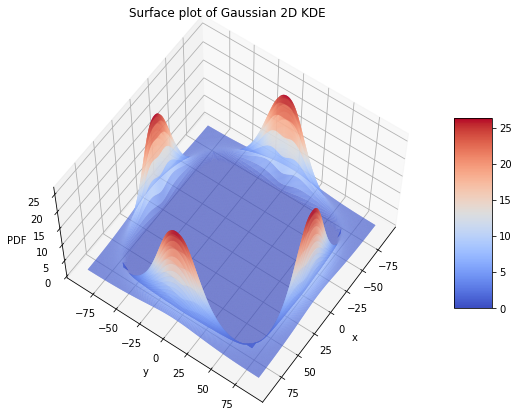

In [9]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(XX,YY,density, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Gaussian 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 35)

In [10]:
x_brute=xy.astype('float32')

In [22]:
model=Square(n_square = 2, energy_array = energy_array)

In [23]:
model_BG=BG_RealNVP(model,dim=model.dim, n_hidden=256, n_block=8)

In [24]:
start=time.time()

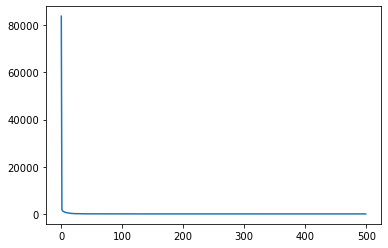

In [25]:
loss=model_BG.train_ML(x_brute,iter=500,lr=1e-4,batch_size=2048)
plt.plot(loss)
plt.show()

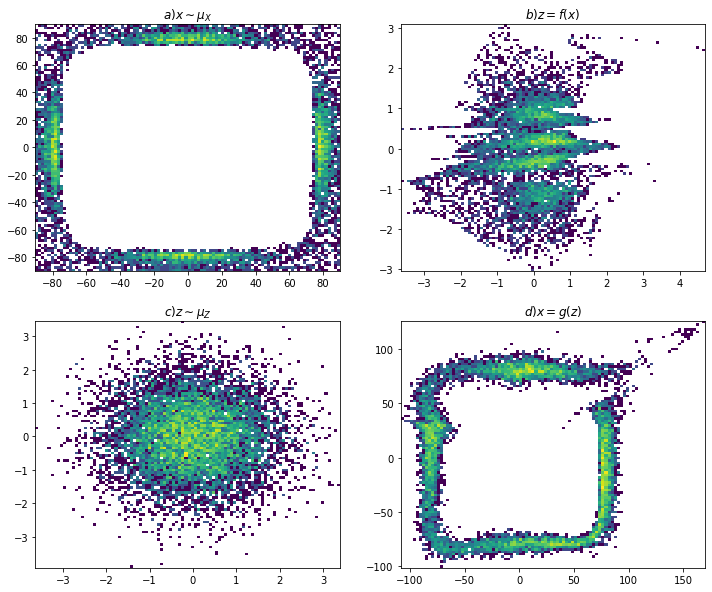

In [26]:
plot_forward_backward_2d(model_BG,x_brute,10000)

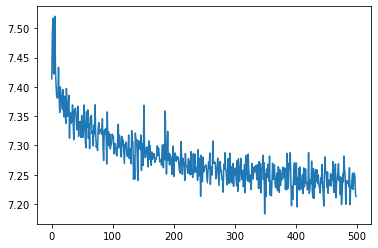

In [27]:
loss=model_BG.train_ML(x_brute,iter=500,lr=1e-5,batch_size=2048)
plt.plot(loss)
plt.show()

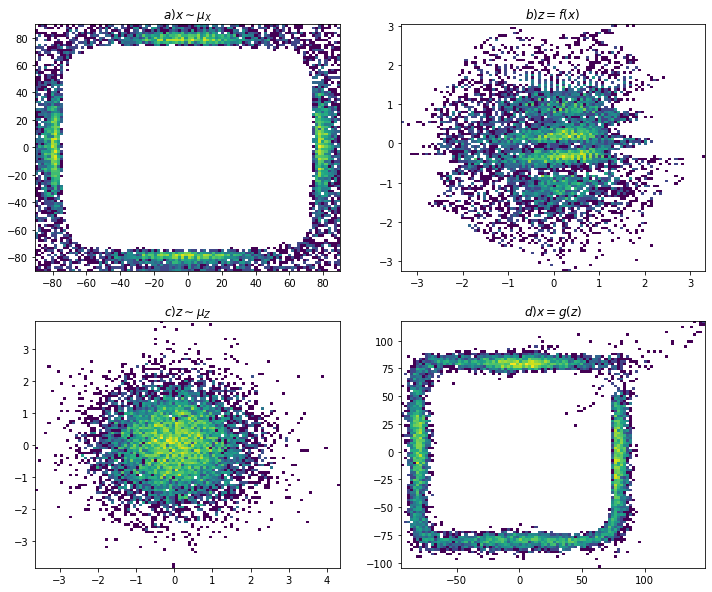

In [28]:
plot_forward_backward_2d(model_BG,x_brute,10000)

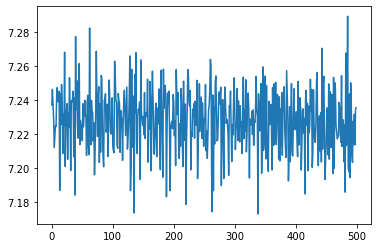

In [29]:
loss=model_BG.train_ML(x_brute,iter=500,lr=1e-6,batch_size=2048)
plt.plot(loss)
plt.show()

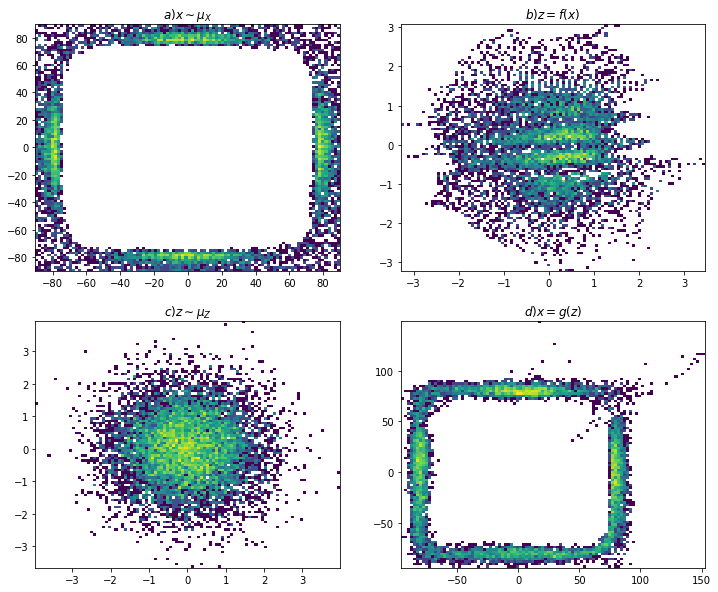

In [30]:
plot_forward_backward_2d(model_BG,x_brute,10000)

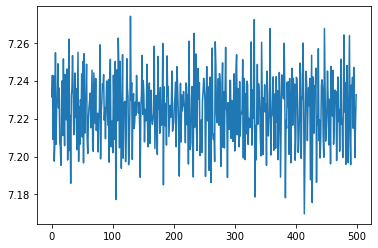

In [33]:
loss=model_BG.train_ML(x_brute,iter=500,lr=1e-7,batch_size=2048)
plt.plot(loss)
plt.show()

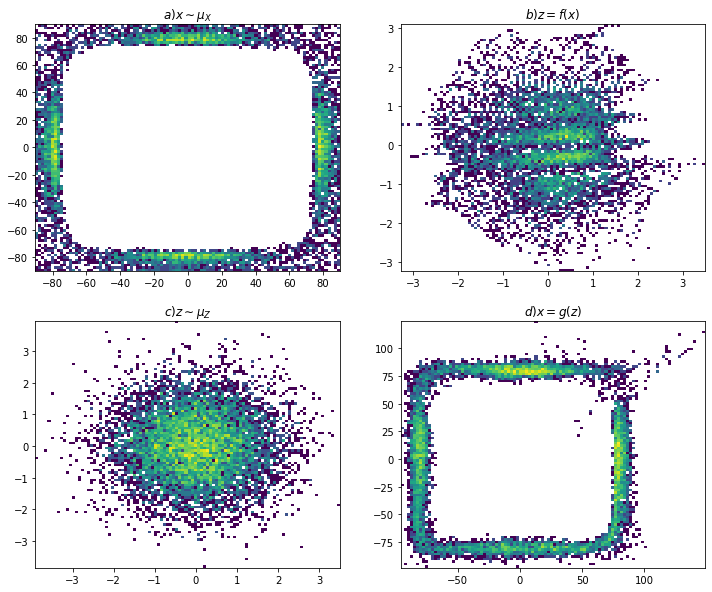

In [34]:
plot_forward_backward_2d(model_BG,x_brute,10000)

In [31]:
end= time.time()

In [32]:
end-start

2625.5590345859528

In [43]:
torch.save(model_BG, "model_BG")